>  making movie industroy

# Project: Investigate a Dataset (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# load the necessary packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [ ]:
# get an overview of the data and explore it
credits = pd.read_csv('tmdb_5000_credits.csv')
movie = pd.read_csv('tmdb_5000_movies.csv')


In [2]:
movies= pd.read_csv('movies.csv')

In [ ]:
credits.head()


In [ ]:
movie.head()

#### after see the output from describe function we can make a conclusion:

> 
>
 
 <ul>
<li>the min value of age = -1 and max value is 115 so this row have to removed</li>

</ul>

In [ ]:
movie.info(), credits.info()



### Data Cleaning (Rename columns and remove misleading values)

#### Renaming columns and drop unnecessary columns

In [ ]:
movies = movie.merge(credits, on='title')


In [ ]:
movies.to_csv('movies.csv',index=False)

In [ ]:
movies.info()


In [ ]:
movies.describe().T

In [3]:
# search for duplicated rows
movies.duplicated().sum()


0

#### Remove miss leading values from data

In [4]:
movies = movies[movies['vote_average'] > 1 ]
movies = movies[movies['vote_count'] > 10 ]
movies = movies[movies['runtime'] > 5 ]
movies = movies[movies['budget'] > 700]
movies = movies[movies['revenue'] > 700]


In [4]:
movies.isna().sum()

budget                     0
genres                     0
homepage                1833
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  219
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

#### Convert json columns to object type (String)

In [5]:
import json
# json_columns  ==> columns which in json format
json_columns = [ 'genres', 'crew', 'keywords',
           'production_companies', 'production_countries', 'spoken_languages', 'cast']
for col in json_columns:
    movies[col] = movies[col].apply(json.loads)



In [6]:
def getDirectorName(director):
    for i in director:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
movies['director']= movies['crew'].apply(getDirectorName)

##### Cleaning json columns after converting it to object type

In [7]:
for column in json_columns:
    for index, i in zip(movies.index, movies[column]):
        list_names = []
        for j in range(len(i)):
           
            list_names.append(i[j]['name'])
            if len(list_names) >= 4:
                break
        movies.loc[index, column] = str(list_names)
    movies[column] = movies[column].str.strip(
        '[]').str.replace('\'', "").str.replace(',', ' |')


In [8]:
movies.status = movies.status.astype('category')
movies.original_language = movies.original_language.astype('category')
movies.release_date = pd.to_datetime(movies.release_date)
movies.runtime = movies.runtime.astype(int)


In [9]:
assert movies.original_title.all() == movies.title.all()
assert movies.id.all() == movies.movie_id.all()


Converting homepage column to category

In [10]:
# convert homepage to category type
movies["homepage"] = np.where(movies["homepage"].isna() == True, 0, 1)
movies["homepage"] = movies["homepage"].astype('category')


In [11]:
movies.drop(columns=['movie_id', 'tagline',
             'spoken_languages','original_title','id','overview'],axis=1,inplace=True)

In [12]:
movies['year']= movies['release_date'].dt.year


In [13]:
s = ['Adventure', 'Fantasy', 'Action']
x=movies[~movies['genres'].isin(s)]
x.head(3)




,budget,genres,homepage,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,director,year
0,237000000,Action | Adventure | Fantasy | Science Fiction,1,culture clash | future | space war | space colony,en,150.437577,Ingenious Film Partners | Twentieth Century Fo...,United States of America | United Kingdom,2009-12-10,2787965087,162,Released,Avatar,7.2,11800,Sam Worthington | Zoe Saldana | Sigourney Weav...,Stephen E. Rivkin | Rick Carter | Christopher ...,James Cameron,2009
1,300000000,Adventure | Fantasy | Action,1,ocean | drug abuse | exotic island | east indi...,en,139.082615,Walt Disney Pictures | Jerry Bruckheimer Films...,United States of America,2007-05-19,961000000,169,Released,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp | Orlando Bloom | Keira Knightley ...,Dariusz Wolski | Gore Verbinski | Jerry Bruckh...,Gore Verbinski,2007
2,245000000,Action | Adventure | Crime,1,spy | based on novel | secret agent | sequel,en,107.376788,Columbia Pictures | Danjaq | B24,United Kingdom | United States of America,2015-10-26,880674609,148,Released,Spectre,6.3,4466,Daniel Craig | Christoph Waltz | Léa Seydoux |...,Thomas Newman | Sam Mendes | Anna Pinnock | Jo...,Sam Mendes,2015


In [62]:
g = movies.groupby(['director', 'title']).sum()
g.head(20)
g.groupby('director').sum().sort_values(by='revenue', ascending=False)

,budget,popularity,revenue,runtime,vote_average,vote_count,year
director,,,,,,,
Steven Spielberg,1667500000,1309.456693,9147393164,3646,188.3,59771,53896
Peter Jackson,1293000000,792.017366,6498642820,1454,66.0,45533,18053
James Cameron,746900000,557.791802,5883569439,1018,51.3,32819,13950
Michael Bay,1410000000,520.982231,5832524638,1758,76.8,26845,24068
Christopher Nolan,1005000000,1482.985962,4227483234,1135,62.4,62653,16057
...,...,...,...,...,...,...,...
Jake Paltrow,15000000,12.185204,20380,93,5.7,41,2007
Kim Farrant,10000000,5.145655,17472,111,5.1,83,2015
Eric Nicholas,1000000,2.175696,10018,78,6.2,20,2006


In [14]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 4804
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3617 non-null   int64         
 1   genres                3617 non-null   object        
 2   homepage              3617 non-null   category      
 3   keywords              3617 non-null   object        
 4   original_language     3617 non-null   category      
 5   overview              3617 non-null   object        
 6   popularity            3617 non-null   float64       
 7   production_companies  3617 non-null   object        
 8   production_countries  3617 non-null   object        
 9   release_date          3617 non-null   datetime64[ns]
 10  revenue               3617 non-null   int64         
 11  runtime               3617 non-null   float64       
 12  status                3617 non-null   category      
 13  title             

<a id='eda'></a>
## Exploratory Data Analysis


#### Function for making a graph about patient who show up or not with specific property

In [ ]:
def patient_properties(col_name: str, label1: str, label2: str, graph_type: str):
    '''
    make a graph about patient who show up or not with specific property
    args:
        col_name  => column name
        label1    => name of label
        label2    => name of label
    return:
        bar graph
    '''
    movies[col_name].value_counts().plot(kind=graph_type,
                                              figsize=(20, 8), grid=True, alpha=0.5, label=label1)
    movies[col_name].value_counts().plot(kind=graph_type,
                                                     figsize=(20, 8), grid=True,  color='r', alpha=0.5, label=label2)
    plt.legend()


### Function to compare year with 2 other columns:<br>
<ul>
<li>x coordinate: column1 , column2</li>
<li>y coordinate: age</li>
</ul>

>
#### make a new 2 dataset to separate dateset for patient who came and didn't

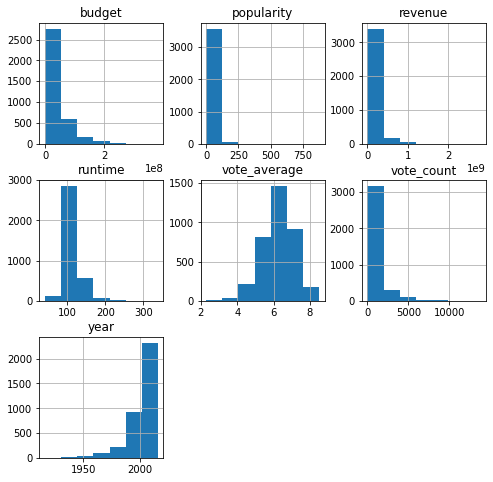

In [21]:
movies.hist(figsize=(8,8), bins=7);


### Movie industry is profitable?

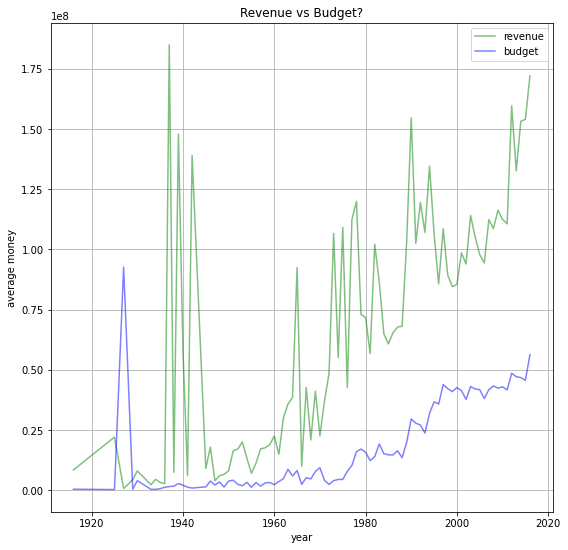

In [15]:
movies.groupby('year').mean().revenue.plot(
    kind='line', figsize=(9, 9), alpha=0.5, color='green',grid=True )
movies.groupby('year').mean().budget.plot(
    kind='line', figsize=(9, 9), alpha=0.5, color='blue', title='Revenue vs Budget?',grid=True)

plt.xlabel('year')
plt.ylabel('average money')

plt.legend()
plt.show()



if we look at this data we can see that the movie industry is profitable
for more than 100 years just one time this industry lost its profit and if we look at this time it was the first world war.


### What is the normal rate of movie and th highest ?(people rate)

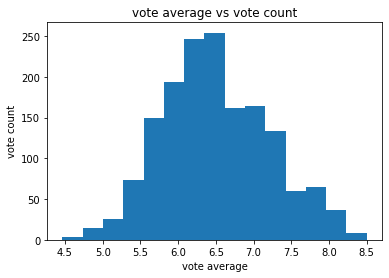

In [24]:
movies.groupby('vote_count').vote_average.mean().plot(
    kind='hist', density=False, bins=15)
plt.xlabel('vote average')
plt.ylabel('vote count')
plt.title('vote average vs vote count')
plt.show()


average movies get rate of 6.5 and the highest rate is 8.5 it not popular to get a movie with high rate

### What genres gain more money ?(people love to watch)

In [39]:
aa = movies.groupby(['crew','title','genres', 'year',
                    'revenue'], sort=False).mean()
aa.head(10)


,,,,,budget,popularity,runtime,vote_average,vote_count
crew,title,genres,year,revenue,,,,,
Stephen E. Rivkin | Rick Carter | Christopher Boyes | Christopher Boyes,Avatar,Action | Adventure | Fantasy | Science Fiction,2009,2787965087,237000000,150.437577,162.0,7.2,11800
Dariusz Wolski | Gore Verbinski | Jerry Bruckheimer | Ted Elliott,Pirates of the Caribbean: At World's End,Adventure | Fantasy | Action,2007,961000000,300000000,139.082615,169.0,6.9,4500
Thomas Newman | Sam Mendes | Anna Pinnock | John Logan,Spectre,Action | Adventure | Crime,2015,880674609,245000000,107.376788,148.0,6.3,4466
Hans Zimmer | Charles Roven | Christopher Nolan | Christopher Nolan,The Dark Knight Rises,Action | Crime | Drama | Thriller,2012,1084939099,250000000,112.312950,165.0,7.6,9106
Andrew Stanton | Andrew Stanton | John Lasseter | Colin Wilson,John Carter,Action | Adventure | Science Fiction,2012,284139100,260000000,43.926995,132.0,6.1,2124
Francine Maisler | Joseph M. Caracciolo Jr. | Sam Raimi | Sam Raimi,Spider-Man 3,Fantasy | Action | Adventure,2007,890871626,258000000,115.699814,139.0,5.9,3576
John Lasseter | Jacob Grimm | Wilhelm Grimm | John Kahrs,Tangled,Animation | Family,2010,591794936,260000000,48.681969,100.0,7.4,3330
Danny Elfman | Christopher Boyes | Christopher Boyes | Sarah Finn,Avengers: Age of Ultron,Action | Adventure | Science Fiction,2015,1405403694,280000000,134.279229,141.0,7.3,6767
Bruno Delbonnel | Stephanie McMillan | Stuart Craig | J.K. Rowling,Harry Potter and the Half-Blood Prince,Adventure | Fantasy | Family,2009,933959197,250000000,98.885637,153.0,7.4,5293


In [5]:
movies.vote_average.mode()

0    6.0
1    6.5
dtype: float64

From this we can see that the genre of action is the most popular genre to get a movie with high revenue from the first 10 movies 8 of them have the genre of Action then Adventure then Fantasy

### Conclusion


> ***Tip***: In this section of the report, I will make some conclusions about the data.

1- movie industry is profitable and in high trend

2- Action, Fantasy and Adventure are the most popular genres to get a movie with high revenue

3-average movies get rate of 6.5 and it easy to find movie with high rate 

4- Best director's make profit:
<ul>

<li>
          Steven Spielberg
            </li>
            <li>Peter Jackson</li>
            <li>James Cameron</li>
            <li>Michael Bay</li>
            <li>Christopher Nolan</li>
</ul>

### hypertension

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])


1